I have 10 pairs of socks in a drawer. Each pair is distinct from another and consists of two matching socks. Alas, I’m negligent when it comes to folding my laundry, and so the socks are not folded into pairs. This morning, fumbling around in the dark, I pull the socks out of the drawer, randomly and one at a time, until I have a matching pair of socks among the ones I’ve removed from the drawer.

On average, how many socks will I pull out of the drawer in order to get my first matching pair?

(Note: This is different from asking how many socks I must pull out of the drawer to guarantee that I have a matching pair. The answer to that question, by the pigeonhole principle, is 11 socks. This question is instead asking about the average.)

Extra credit: Instead of 10 pairs of socks, what if I have some large number N pairs of socks?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use('ggplot')
import matplotlib.ticker as mtick

In [2]:
datestr = '2019-12-20'
total = 10*2
socks = list(range(total))

Approach = for each number of draws in range, take a sample and see how many contain a matching pair i.e. an n divis by 2 where n+1 also in the list.

In [3]:
min_len = 2
max_len = total//2+1
samples = 10000

pairs = [(n,n+1) for n in socks if n%2==0]
counts = pd.DataFrame(index=range(min_len, max_len+1), columns=['count'])

In [4]:
for picks in range(min_len,max_len+1):
    counter = 0
    for i in range(samples):
        choice = np.random.choice(socks, size=picks, replace=False)
        matches = [np.intersect1d(p, choice) for p in pairs]
        if max([len(m) for m in matches]) == 2:
            counter += 1
    counts.loc[picks, :] = counter

In [5]:
counts['pct_with_pairs'] = 100 * counts['count'] / samples
counts['pct_of_pairs'] = 100 * counts['count'] / sum(counts['count'])
counts['pct_of_pairs_cum'] = np.cumsum(counts['pct_of_pairs'])
counts.to_csv(datestr + 'counts.csv')

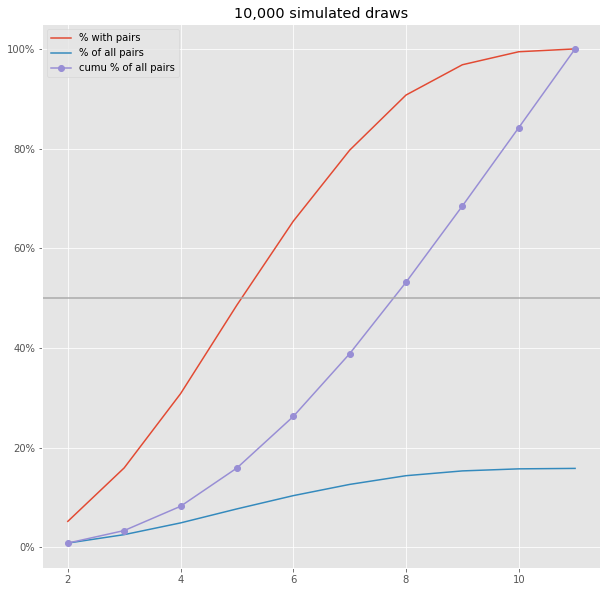

In [7]:
chart = counts['pct_with_pairs'].plot(label='% with pairs', figsize=(10, 10))
chart = counts['pct_of_pairs'].plot(label='% of all pairs')
chart = counts['pct_of_pairs_cum'].plot(label='cumu % of all pairs', marker='o')
plt.axhline(y=50, linestyle='-', color='#aaaaaa')
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
chart.yaxis.set_major_formatter(yticks)
plt.legend()
plt.title(f"{samples:,g}" + ' simulated draws')
plt.savefig(datestr + 'counts.png')

In [9]:
expected = np.dot(counts['count'], counts.index) / sum(counts['count'])
expected

8.008805488807386